## Étiquette énergie des voitures pour mesurer les émissions de CO2



Les Étiquettes énergie/CO2 des véhicules sont des écolabels permettant d'identifier les émissions de carbone (CO2) du véhicule pour 100 kilomètres parcourus. Ces émissions de CO2 sont mesurées en grammes de CO2 par kilomètre. 

Les étiquettes CO2 des automobiles comportent un classement de la lettre A à la lettre G, A caractérisant les véhicules qui émettent le moins de carbone, et G ceux qui en émettent le plus.


 En 2008, un système de bonus-malus écologique a été mis en place pour l'achat d'une voiture neuve, pour inciter à choisir un véhicule peu émetteur de gaz à effet de serre afin de lutter contre le réchauffement climatique. L'étiquette énergie pour les voitures est semblable à l'étiquettte énergie pour l'électroménager, ainsi que celle pour les ampoules.

Source : http://www.vedura.fr/guide/ecolabel/etiquette-energie-CO2-voiture

| Classe | Émissions de CO2 (g/km)                |
|--------|----------------------------------------|
| A      | inférieures ou égales à 100 g/CO2/km   |
| B      | de 101 à 120 g/CO2/km                  |
| C      | de 121 à 140 g/CO2/km                  |
| D      | de 141 à 160 g/CO2/km                  |
| E      | de 161 à 200 g/CO2/km                  |
| F      | de 201 à 250 g/CO2/km                  |
| G      | supérieures à 250 g/CO2/km             |


# Récupération des données à traiter

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import itertools
import shap
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from joblib import dump, load

sys.stdout.flush()

def dumpModel(model, filename ):
    dump(model, '../models/' + filename)

def loadModel(filename):
    return load('../models/' + filename)

def modelAlreadyTrain(filename):
    return os.path.isfile(filename)

def savePickleModel(model, filename):
    with open('../models/' + filename, 'wb') as f:
        pickle.dump(model, f)
        f.close()

def loadPickleModel(filename):
    with open('../models/' + filename, 'rb') as f:
        model = pickle.load(f)
        f.close()
        return model

### Création des jeux de données d'entrainement et des jeux de données de test

In [2]:
df=pd.read_csv('../Data/processed/Co2_final.csv')

In [3]:
def calcTarget(X):
    if X <= 100 :
        return 1
    elif X > 100 and X <= 120:
        return 2
    elif X > 120 and X <= 140:
        return 3
    elif X > 140 and X <= 160:
        return 4
    elif X > 160 and X <= 200:
        return 5
    elif X > 200 and X <= 250:
        return 6
    elif X > 250 :
        return 7


df['target'] = df['Ewltp (g/km)'].apply(lambda x : calcTarget(x))

display(df)

,ID,Mp,T,m (kg),Ewltp (g/km),W (mm),At1 (mm),ec (cm3),ep (KW),Fuel consumption,...,Ft_e85,Ft_lpg,Ft_ng,Ft_petrol,Ft_petrol/electric,Fm_F,Fm_H,Fm_M,Fm_P,target
0,77074142.0,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,...,0,0,0,1,0,0,0,1,0,2
1,77074143.0,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,...,0,0,0,1,0,0,0,1,0,2
2,77074144.0,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,...,0,0,0,1,0,0,0,1,0,2
3,77074145.0,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,...,0,0,0,1,0,0,0,1,0,2
4,77074146.0,0.148938,0.003688,993.0,117.0,2492.0,1455.0,999.0,48.0,5.2,...,0,0,0,1,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498781,86000028.0,0.148938,0.004701,940.0,113.0,2450.0,1430.0,1193.0,52.0,5.0,...,0,0,0,1,0,0,0,1,0,2
3498782,86000029.0,0.148938,0.004701,985.0,125.0,2450.0,1430.0,1193.0,52.0,5.5,...,0,0,0,1,0,0,0,1,0,3
3498783,86000030.0,0.148938,0.004701,985.0,125.0,2450.0,1430.0,1193.0,52.0,5.5,...,0,0,0,1,0,0,0,1,0,3
3498784,86000031.0,0.148938,0.004701,985.0,125.0,2450.0,1430.0,1193.0,52.0,5.5,...,0,0,0,1,0,0,0,1,0,3


In [4]:
X = df.drop(columns=['Ewltp (g/km)', 'ID', 'target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

> Mise à l'echelle des différentes valeurs

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## KNN

current k value: 1
current k value: 2
current k value: 3
current k value: 4
current k value: 5
current k value: 6
current k value: 7
current k value: 8
current k value: 9
Algorithme KNN avec distance minkowski réalisé
Temps d'exécution pour déterminer le meilleur parametre: 27760.926386356354 secondes


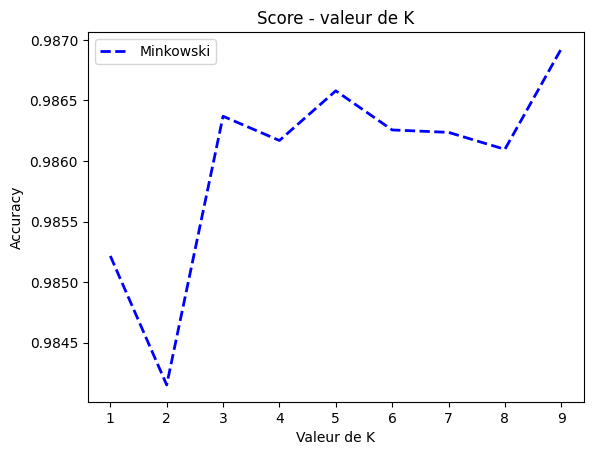

In [ ]:
from sklearn import neighbors

score_minko = []
score_man = []
score_cheb = []

if modelAlreadyTrain('KNNClassifier.pkl'):
    model = loadPickleModel('KNNClassifier.pkl')
else :

    # Début du chronométrage
    start_time = time.time()
    for k in range(1, 10):
        print(f'current k value: {k}')
        model = neighbors.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        score_minko.append(model.score(X_test, y_test))
    
    print("Algorithme KNN avec distance minkowski réalisé")
    
    # Fin du chronométrage
    end_time = time.time()
    # Calcul du temps écoulé
    elapsed_time = end_time - start_time
    print(f"Temps d'exécution pour déterminer le meilleur parametre: {elapsed_time} secondes")

    plt.plot(range(1, 10), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
    plt.title('Score - valeur de K')  
    plt.xlabel('Valeur de K')  
    plt.ylabel('Accuracy') 
    plt.legend();

In [6]:
from sklearn import neighbors

# Début du chronométrage
start_time = time.time()
model_best = neighbors.KNeighborsClassifier(n_neighbors=9)
model_best.fit(X_train, y_train)
    # Fin du chronométrage
end_time = time.time()
    # Calcul du temps écoulé
elapsed_time = end_time - start_time
print(f"Temps d'exécution pour fitter sur le meilleur modèle: {elapsed_time} secondes")

savePickleModel(model_best,'KNNClassifier.pkl')
model = model_best

Temps d'exécution pour fitter sur le meilleur modèle: 0.46849799156188965 secondes


In [7]:
from ClassificationModel import ClassificationModel
KNNModel = ClassificationModel('KNNClassifier',
                               model_best, 
                               X_train, 
                               X_test, 
                               y_train, 
                               y_test, 
                               X.columns)
 # Début du chronométrage
start_time = time.time()
KNNModel.predictModel()
    # Fin du chronométrage
end_time = time.time()
    # Calcul du temps écoulé
elapsed_time = end_time - start_time
print(f"Temps d'exécution pour prédire sur le meilleur modèle: {elapsed_time} secondes")

KNNModel.calcScore()
KNNModel.displayScore()

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Temps d'exécution pour fitter sur le meilleur modèle: 18833.768667697906 secondes
RMSE Jeux d entrainement : 0.12035079493038679
RMSE Jeux de test : 0.12225042641091483
Score du modèle train (R²) 0.9869561862189303
Score du modèle test (R²) 0.9866911132134252
Classification Report :
              precision    recall  f1-score   support

           A       1.00      1.00      1.00    109882
           B       0.98      0.98      0.98    134814
           C       0.98      0.98      0.98    242103
           D       0.98      0.99      0.98    118751
           E       0.99      0.99      0.99     62022
           F       0.99      0.99      0.99     24560
           G       0.99      0.99      0.99      7626

    accuracy                           0.99    699758
   macro avg       0.99      0.99      0.99    699758
weighted avg       0.99      0.99      0.99    699758



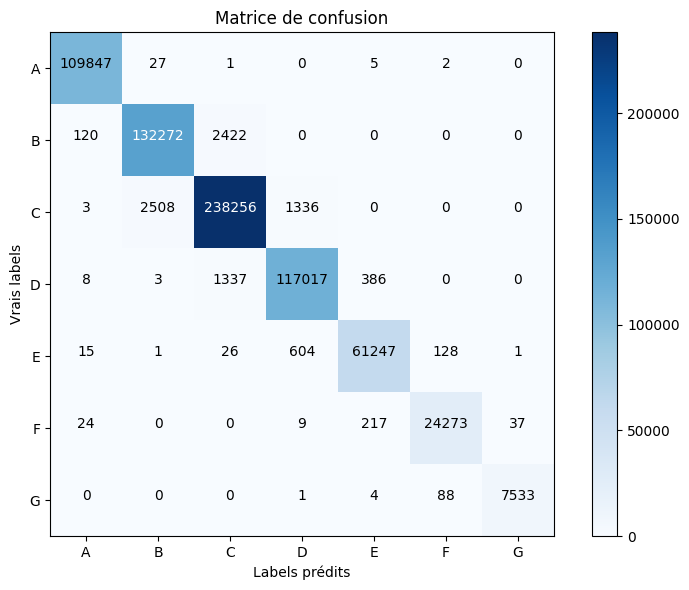

In [8]:
KNNModel.displayConfusionMatrix()

In [12]:
KNNModel.writeResults()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

sample_size = 5000

splitter = StratifiedShuffleSplit(
            n_splits=1,
            test_size=sample_size / KNNModel.X_test.shape[0],
            random_state=42,
        )

In [ ]:
for _, test_idx in splitter.split(KNNModel.X_test, KNNModel.y_test):
    X_test_sample = KNNModel.X_test[test_idx]

        # Initialisation pour les SHAP globales
num_features = X_test_sample.shape[1]
num_classes = len(np.unique(KNNModel.y_test))  # Nombre de classes
shap_values_aggregated = [np.zeros((X_test_sample.shape[0], num_features)) for _ in range(num_classes)]


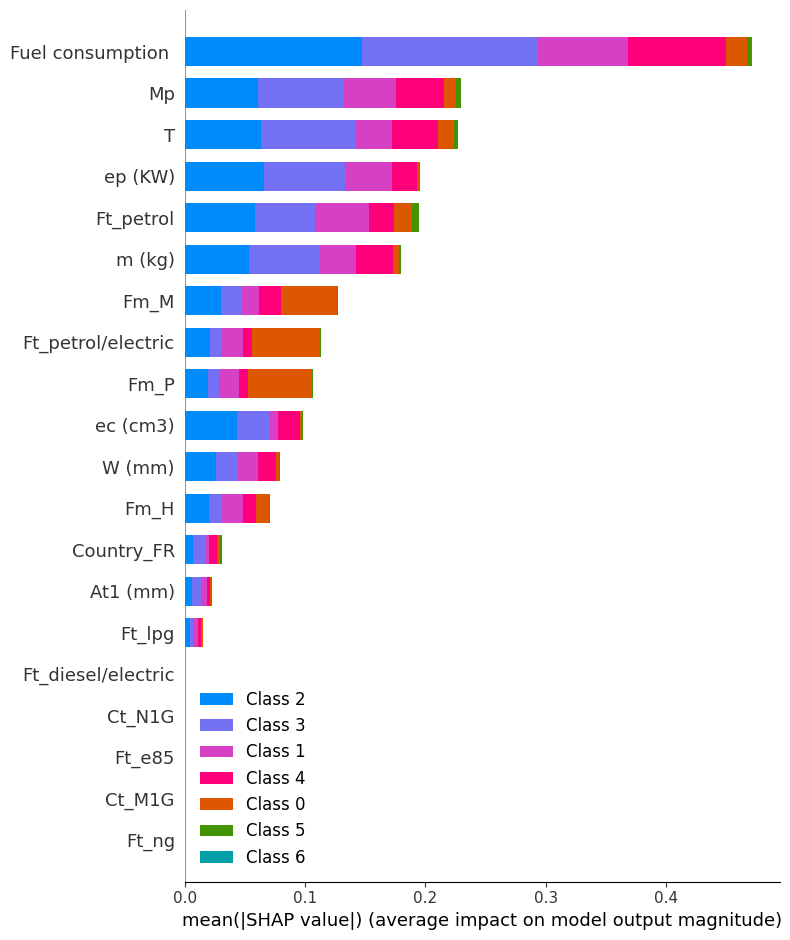

In [23]:
#B
import shap
X_test_sample_df = pd.DataFrame(X_test_sample, columns=X.columns)
# Afficher un résumé des valeurs SHAP
shap.summary_plot(shap_values, X_test_sample_df)

22
7


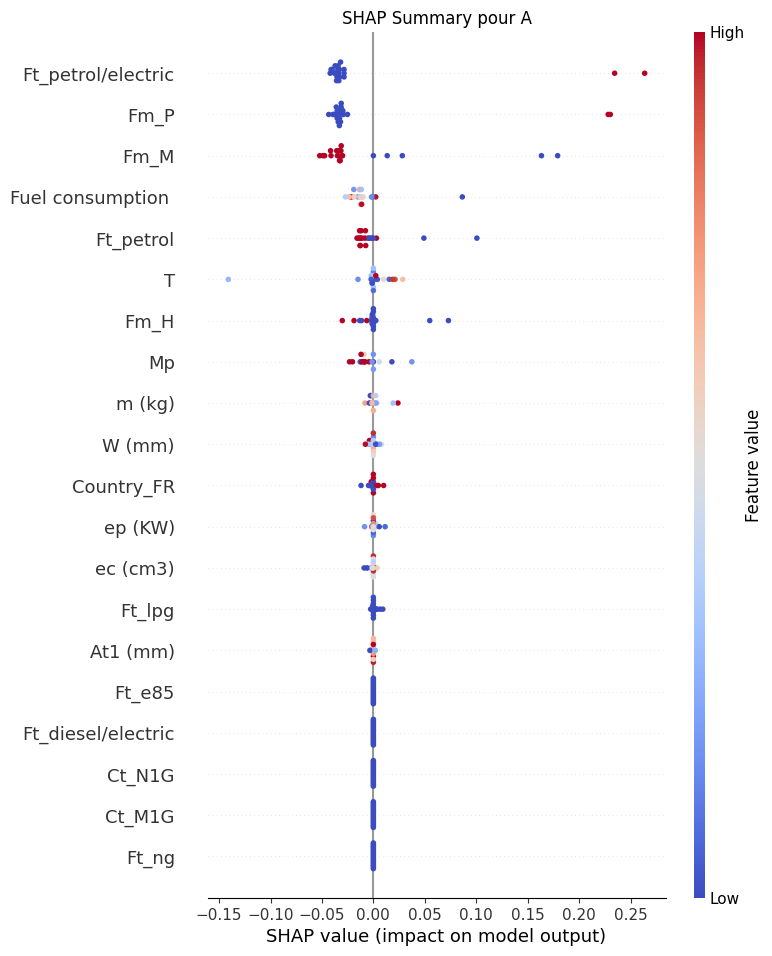

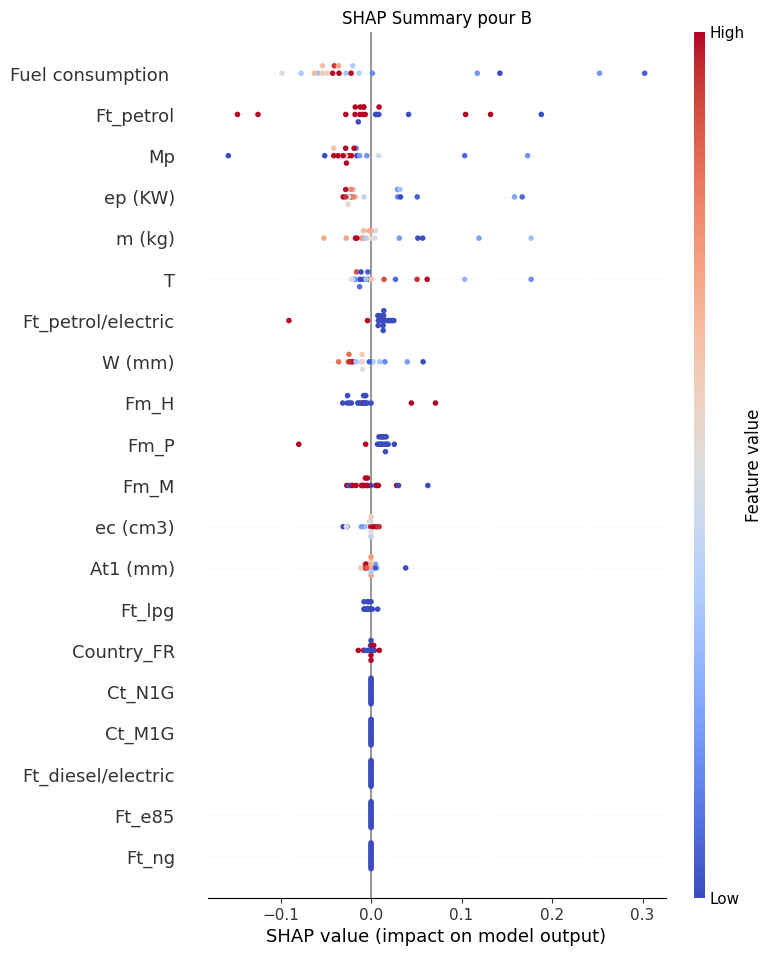

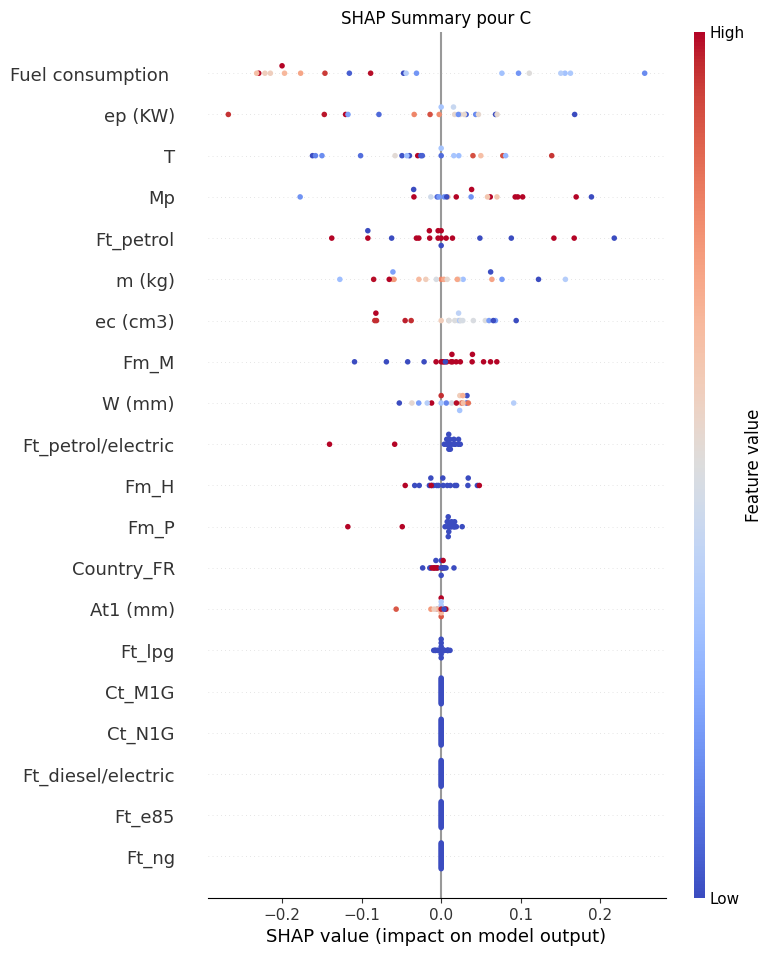

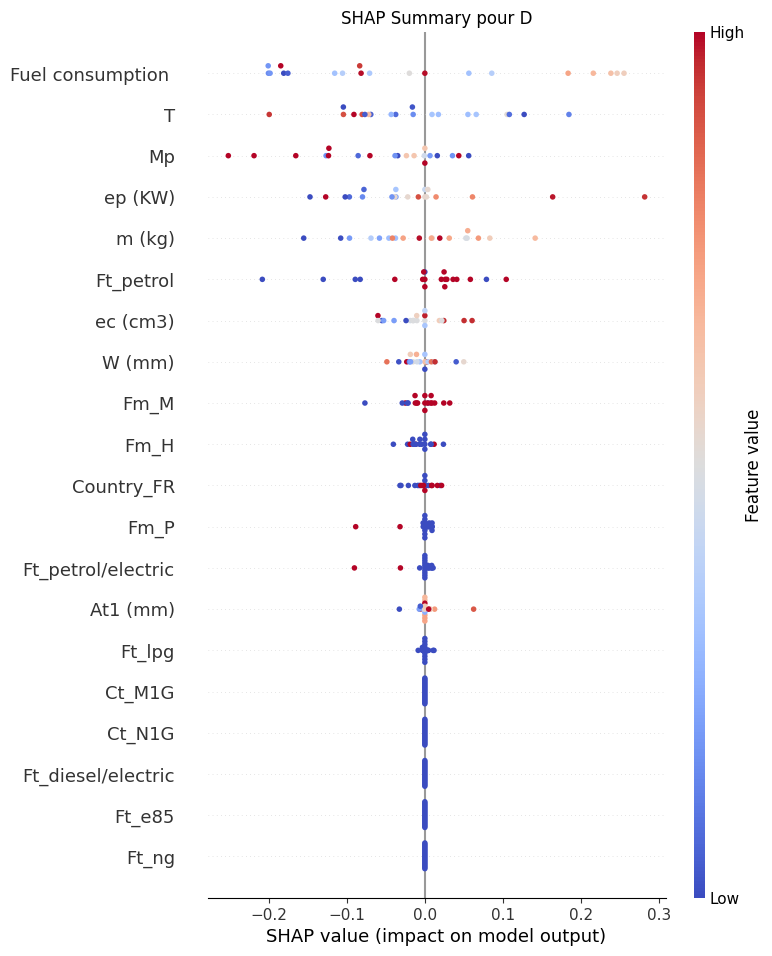

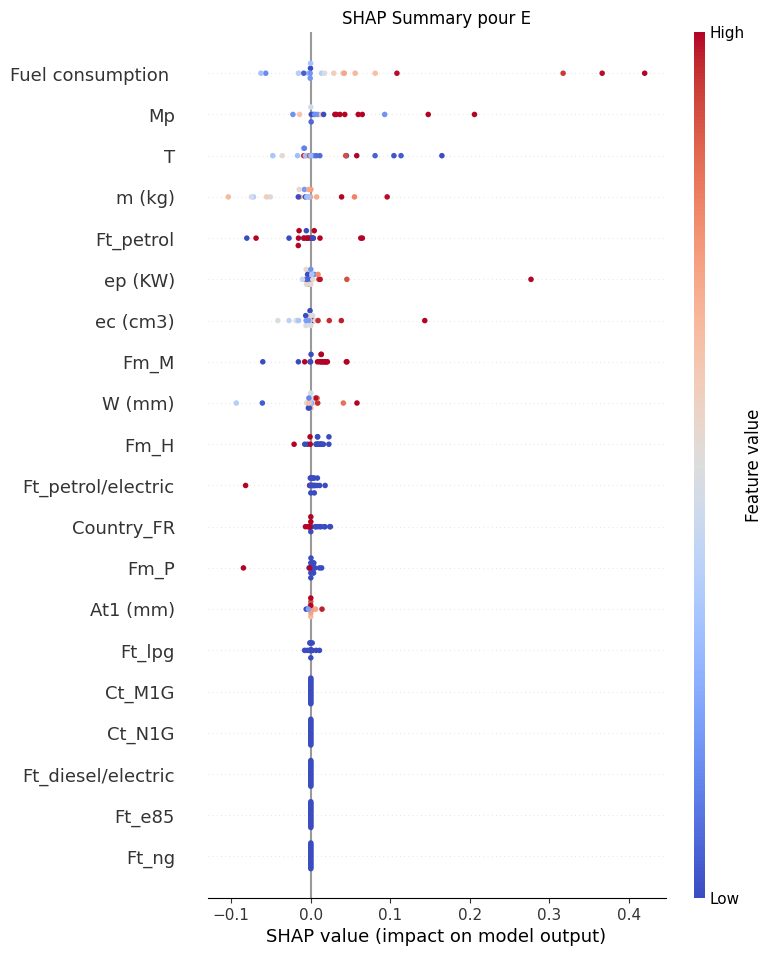

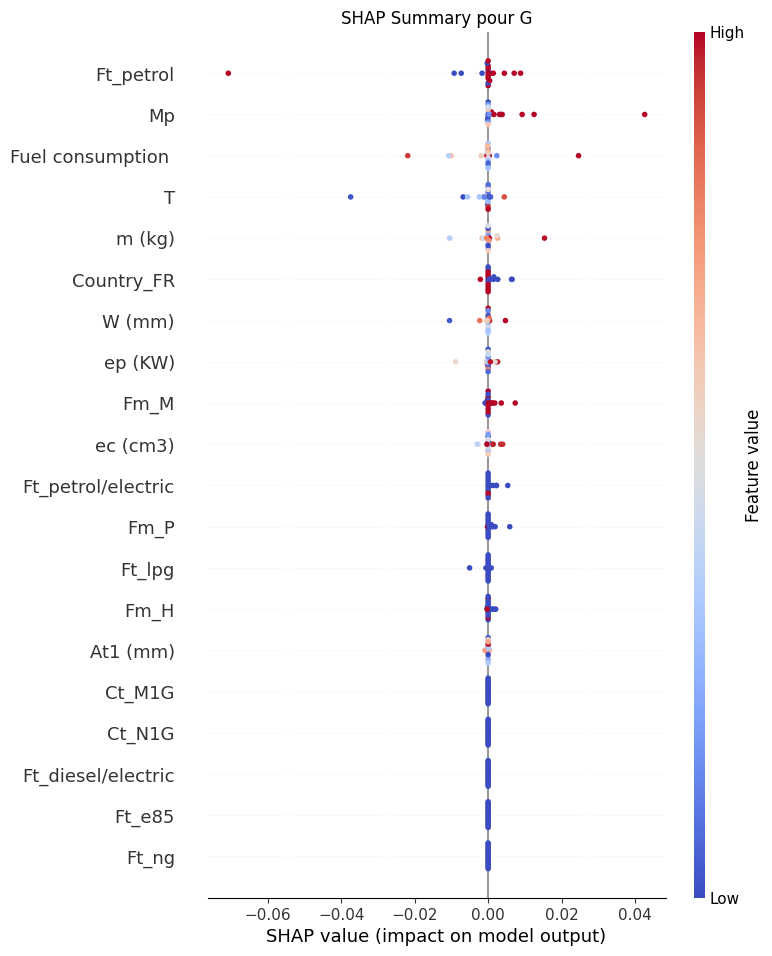

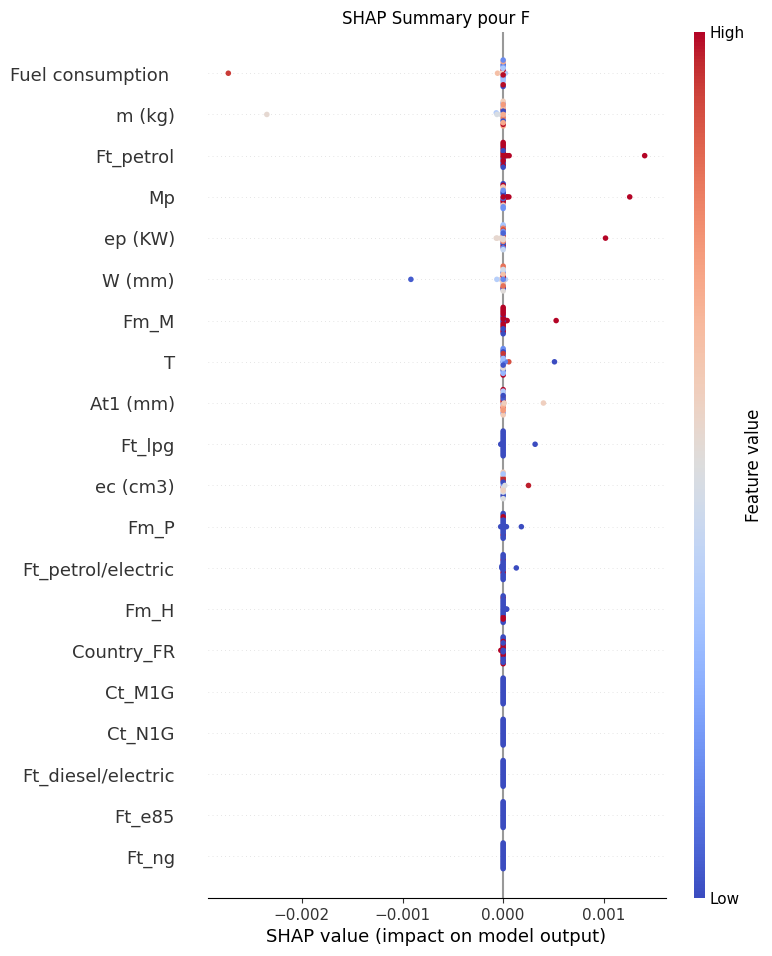

In [29]:
#C
num_features = X_test_sample.shape[1]
num_classes = len(np.unique(y_test))  # Nombre de classes
print(num_features)
print(num_classes)
shap_values_aggregated = [np.zeros((X_test_sample.shape[0], num_features)) for _ in range(num_classes)]
className = {0: "A", 1: "B", 2: "C", 3:"D", 4 :"E", 5 :"G", 6: "F" }
if isinstance(shap_values, list):
    for i in range(num_classes):
        shap_values_aggregated[i] = shap_values[i]
    shap_values_mean = shap_values_aggregated

        # SHAP par classe
for i in range(num_classes):
    shap.summary_plot(
        shap_values_mean[i],
        X_test_sample,
        class_names=[className[j] for j in range(num_classes)],
        show=False,
        feature_names=X.columns,
        cmap='coolwarm',
        )
    plt.title(f"SHAP Summary pour {className[i]}")
    plt.show()